<a href="https://colab.research.google.com/github/Idighekere/laptop-price-prediction-ml-model/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Prediction

- **Dataset:** [Laptop Price Dataset on Kaggle](https://www.kaggle.com/datasets/muhammetvarl/laptop-price)
- **Group:** Group **D**
- **Task**: Developong a robust linear regression model that can predict the price of a laptop given its various attributes
- **Random State:** 5
- **Test Size:** 25%
- **Required Libraries:**: `pandas`, `seaborn`, `matplotlib`, `numpy`, `os`, `joblib`

## Importing dependencies and Initializations


In [116]:
# Innstalling required packages:
%pip install os seaborn matplotlib numpy pandas joblib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initializing constants to be used in model building
RANDOM_STATE=5
TEST_SIZE=25/100 # i.e 25 %

## Loading datasets



In [118]:
df=pd.read_csv("dataset/laptop_price.csv",encoding='latin-1')

# display first 10 rows
df.head(10)
# Display the number of rows and columns
df.shape

(1303, 13)

## Data Cleaning and Preprocessing:

1. Identify and handle missing values appropriately.

In [119]:

# Identifying Missing Vlues
df.isnull().sum()
# The result shows that there are no missing values

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

2. Address outliers in numerical features.

In [120]:

## remove gb and kg from Ram and weight and convert the cols to numeric
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df=df.drop('laptop_ID',axis=1)  # dropping laptop_ID as it is not useful for prediction

# Identifying nmerial columns
numerical_columns = df.select_dtypes(include=np.number).columns

# finding outliers

for col in numerical_columns:

    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers

    # Addressing outliers by removing them
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


3. Convert categorical features into numerical representations suitable for machine learning algorithms. Clearly document your chosen encoding strategies.

In [121]:
# This is handled after the feature engieering section to avoid encoding features multiple times

## Exploratory Data Analysis (EDA)

1. Conduct a comprehensive EDA to understand the distribution of features and their relationships with the price.

In [122]:
# Setting up the plot style
plt.style.use('seaborn-v0_8-whitegrid')

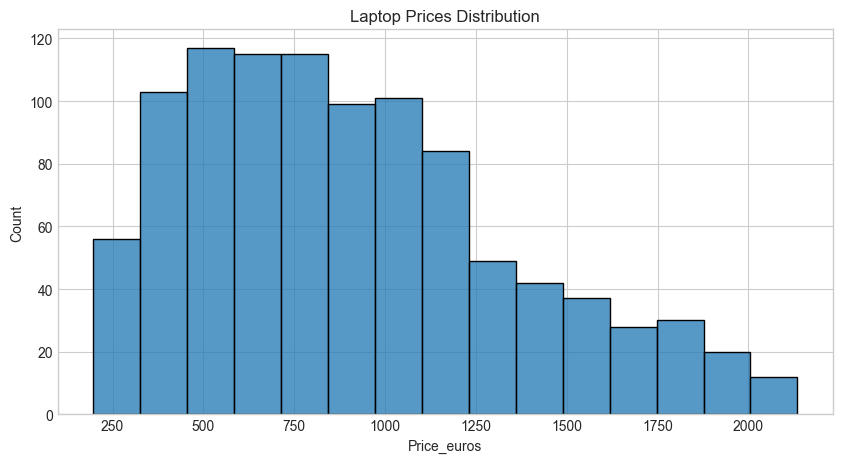

In [123]:
# Histogram of Laptop Prices Distribution
laptop_prices = df['Price_euros']

plt.figure(figsize=(10, 5))
sns.histplot(data=laptop_prices, bins=15, kde=False, legend=True)
plt.title('Laptop Prices Distribution')
plt.show()

In [124]:
# Sorted Laptop Prices
sorted_prices = df.sort_values('Price_euros')

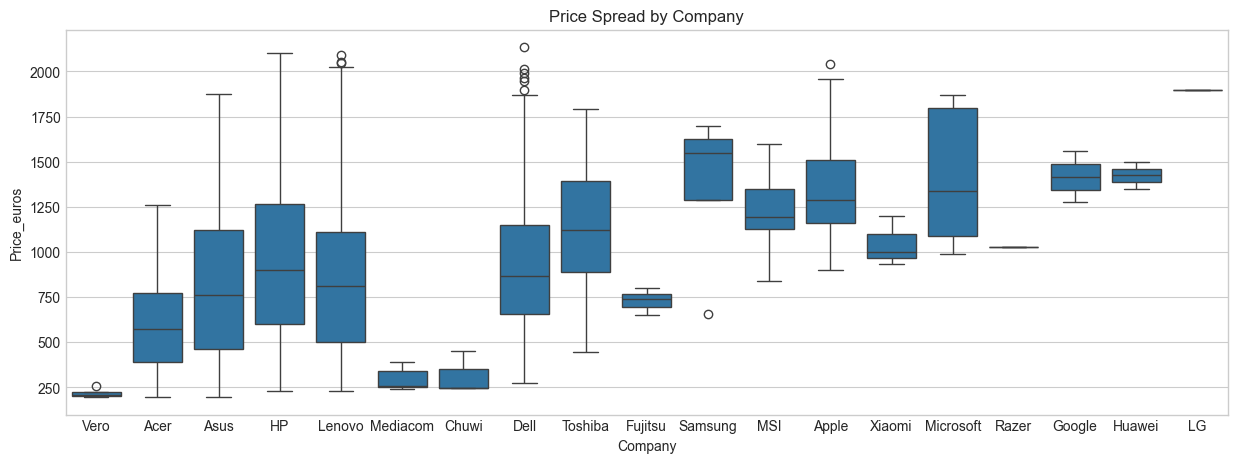

In [125]:
# Boxplot of Price Spread Vs Company

plt.figure(figsize=(15, 5))
sns.boxplot(x='Company', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Company')
plt.show()

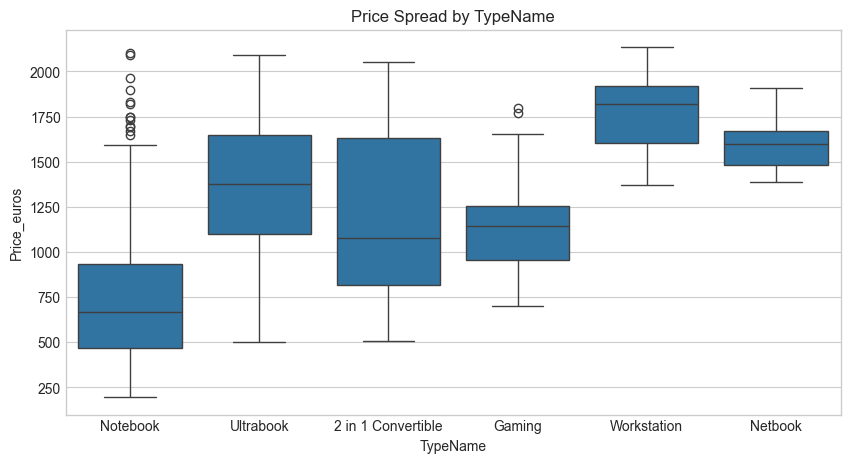

In [126]:
# Boxplot of Price Spread Vs TypeName
plt.figure(figsize=(10, 5))
sns.boxplot(x='TypeName', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by TypeName')
plt.show()

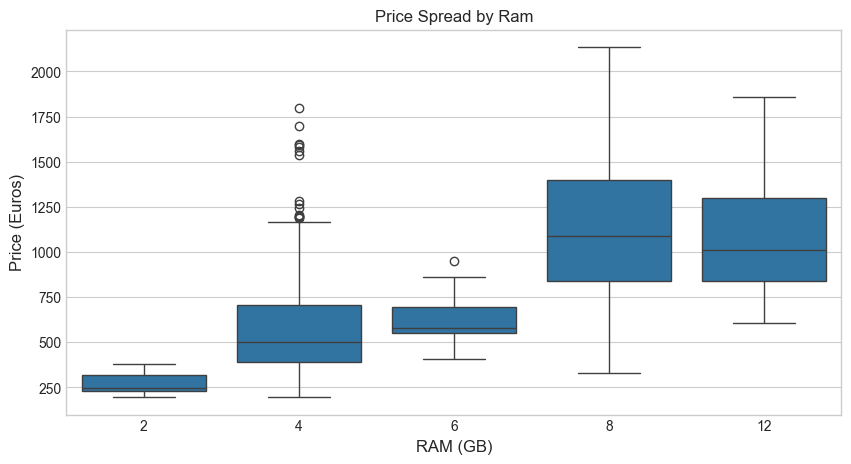

In [127]:
# Boxplot of Price Vs Ram
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ram', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Ram')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

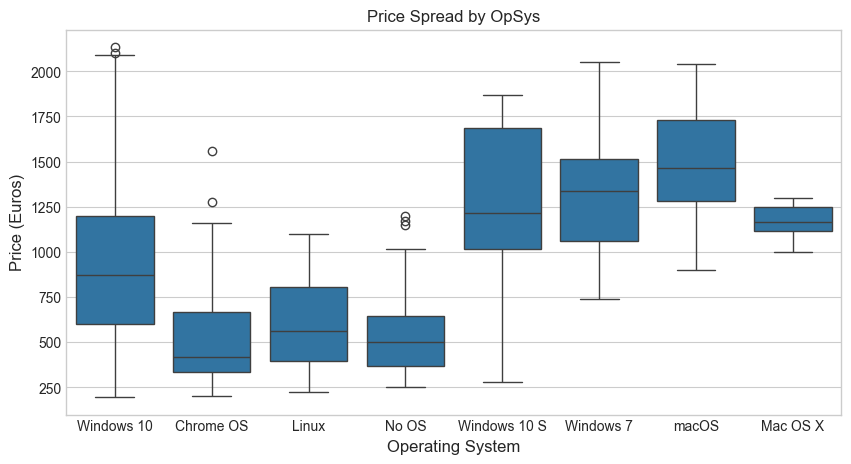

In [128]:
# Boxplot of Price Vs Operating System
plt.figure(figsize=(10, 5))
sns.boxplot(x='OpSys', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by OpSys')
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

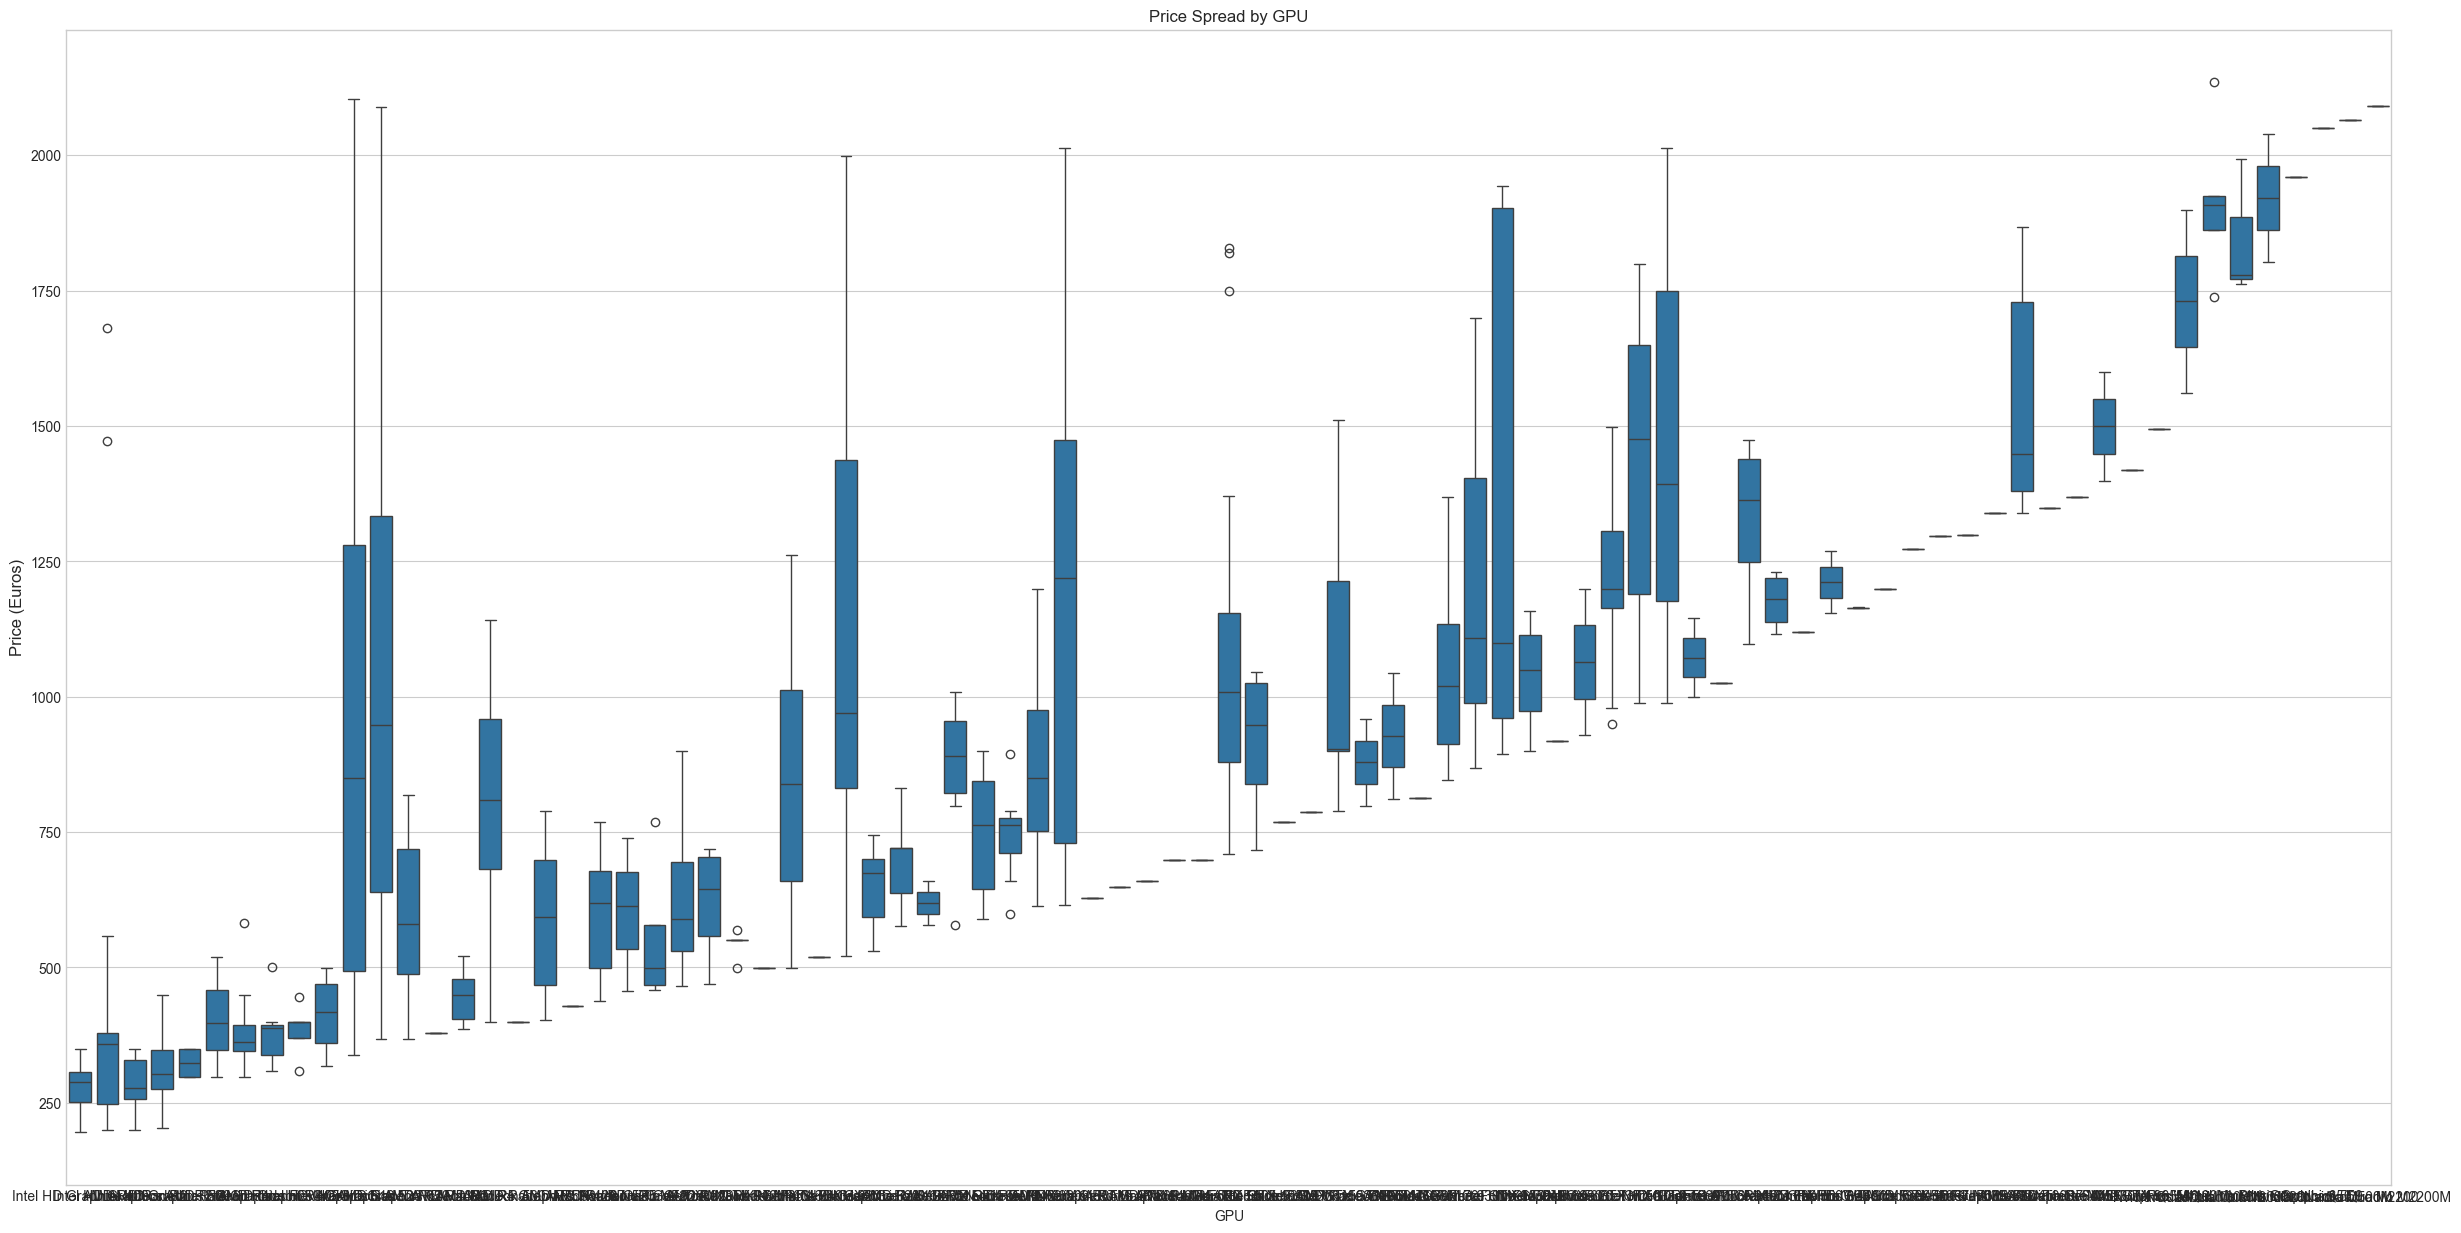

In [129]:
# Boxplot of Price Vs GPU
plt.figure(figsize=(30, 15))
sns.boxplot(x='Gpu', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by GPU')
plt.xlabel('GPU')
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

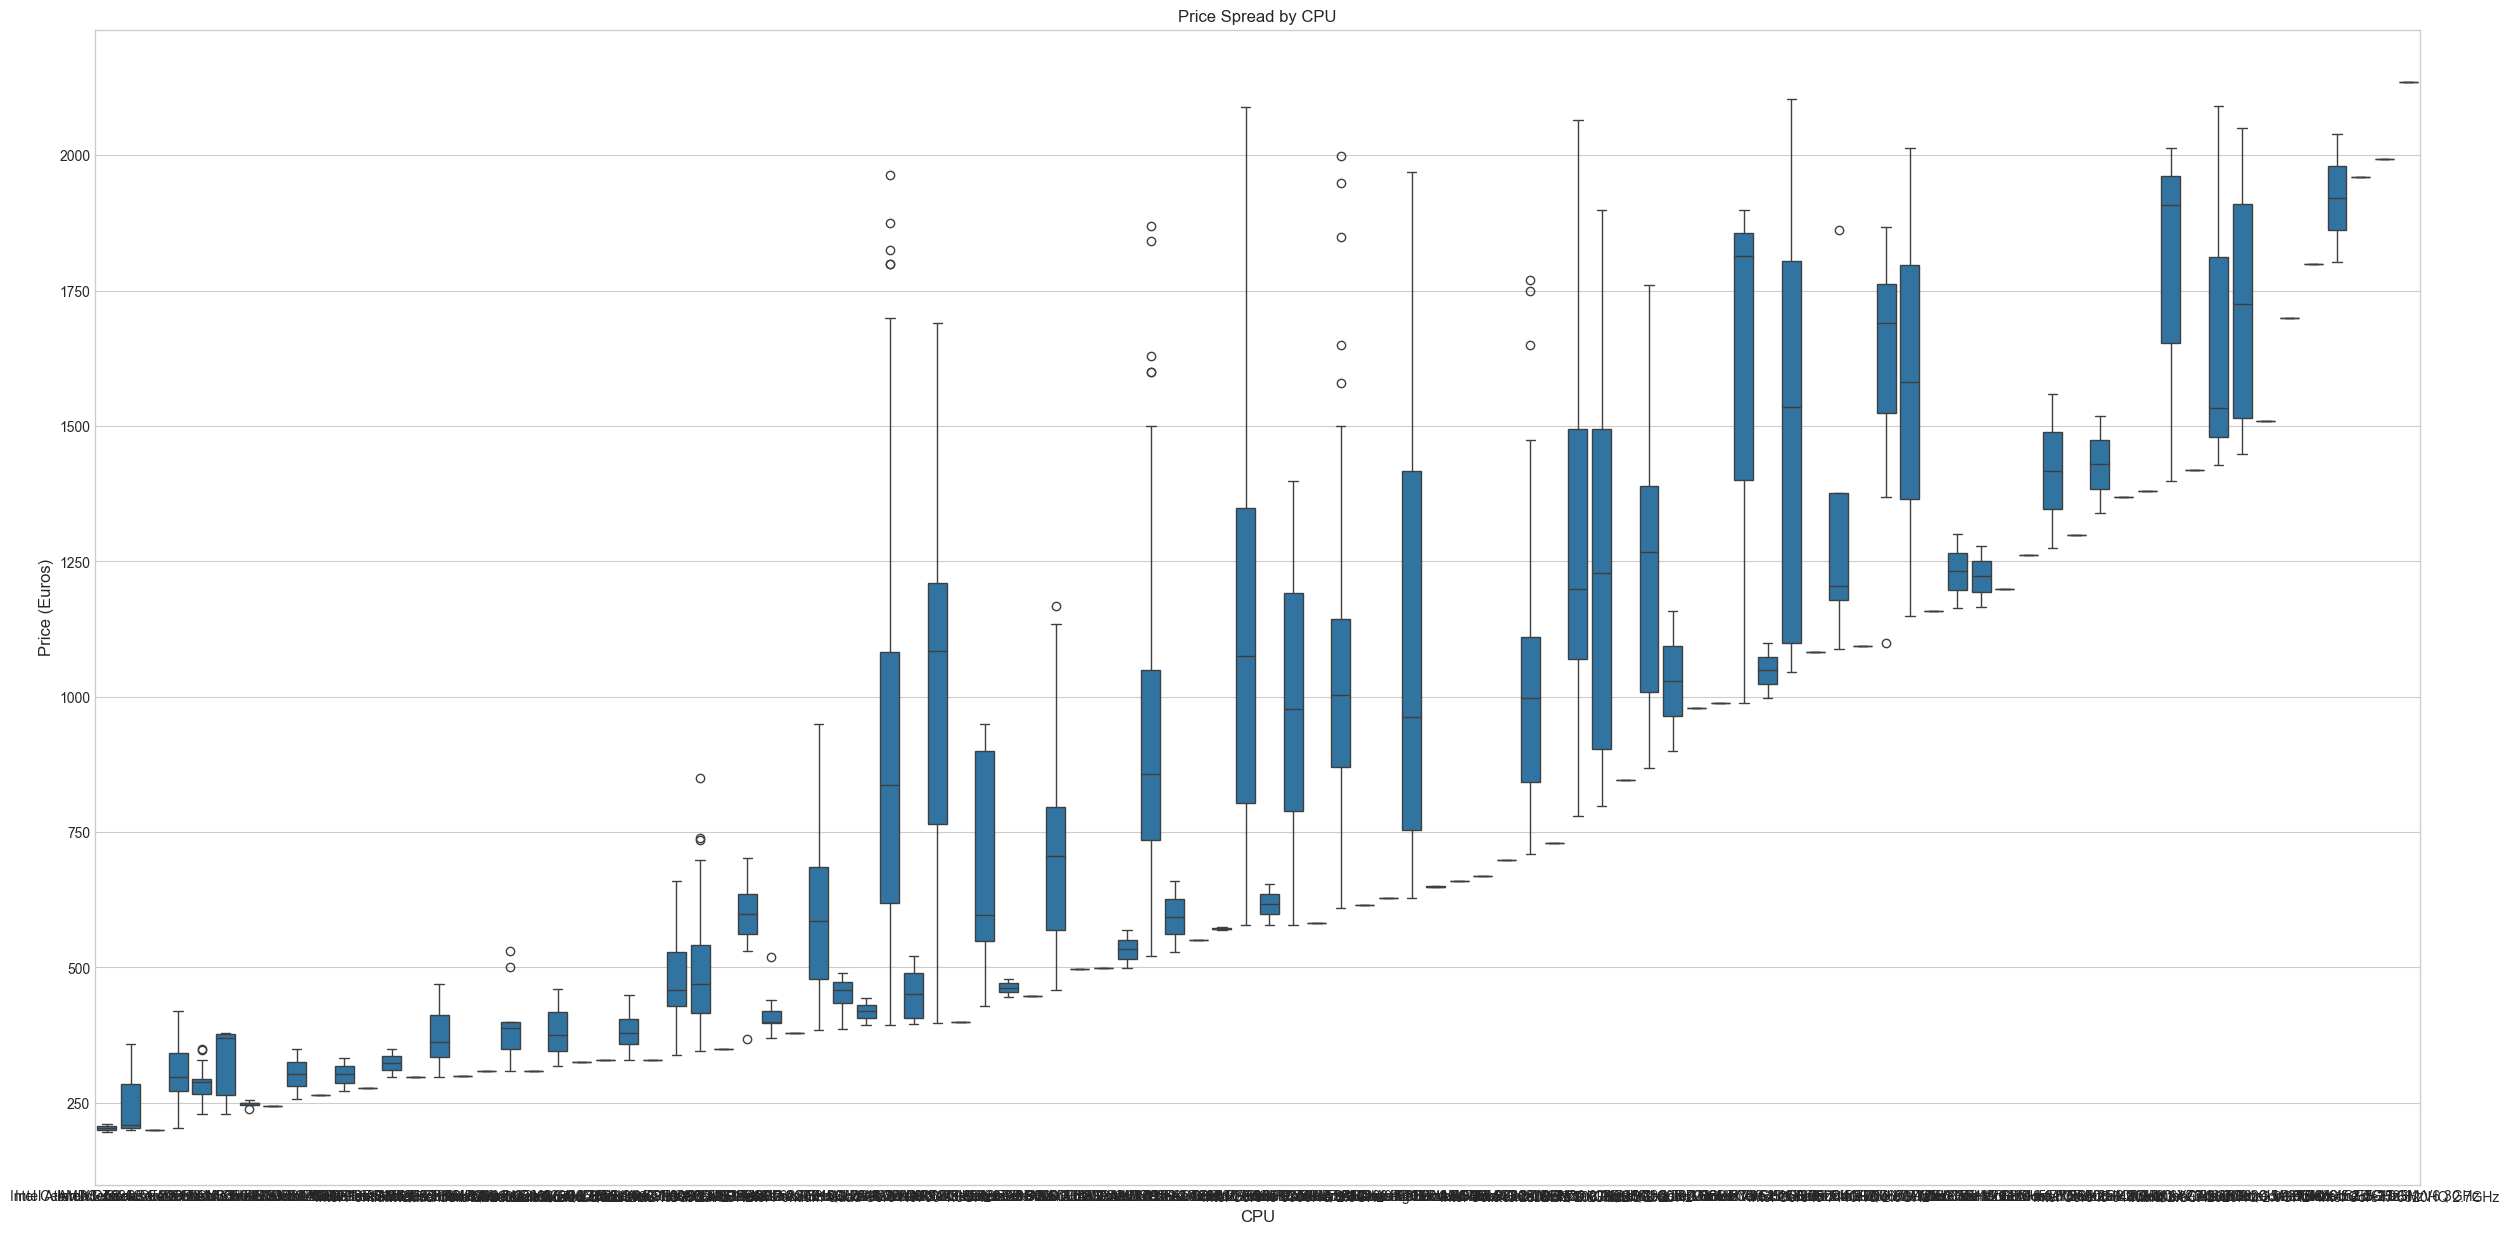

In [130]:
# Boxplot of Price Vs CPU
plt.figure(figsize=(30, 15))
sns.boxplot(x='Cpu', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by CPU')
plt.xlabel('CPU', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

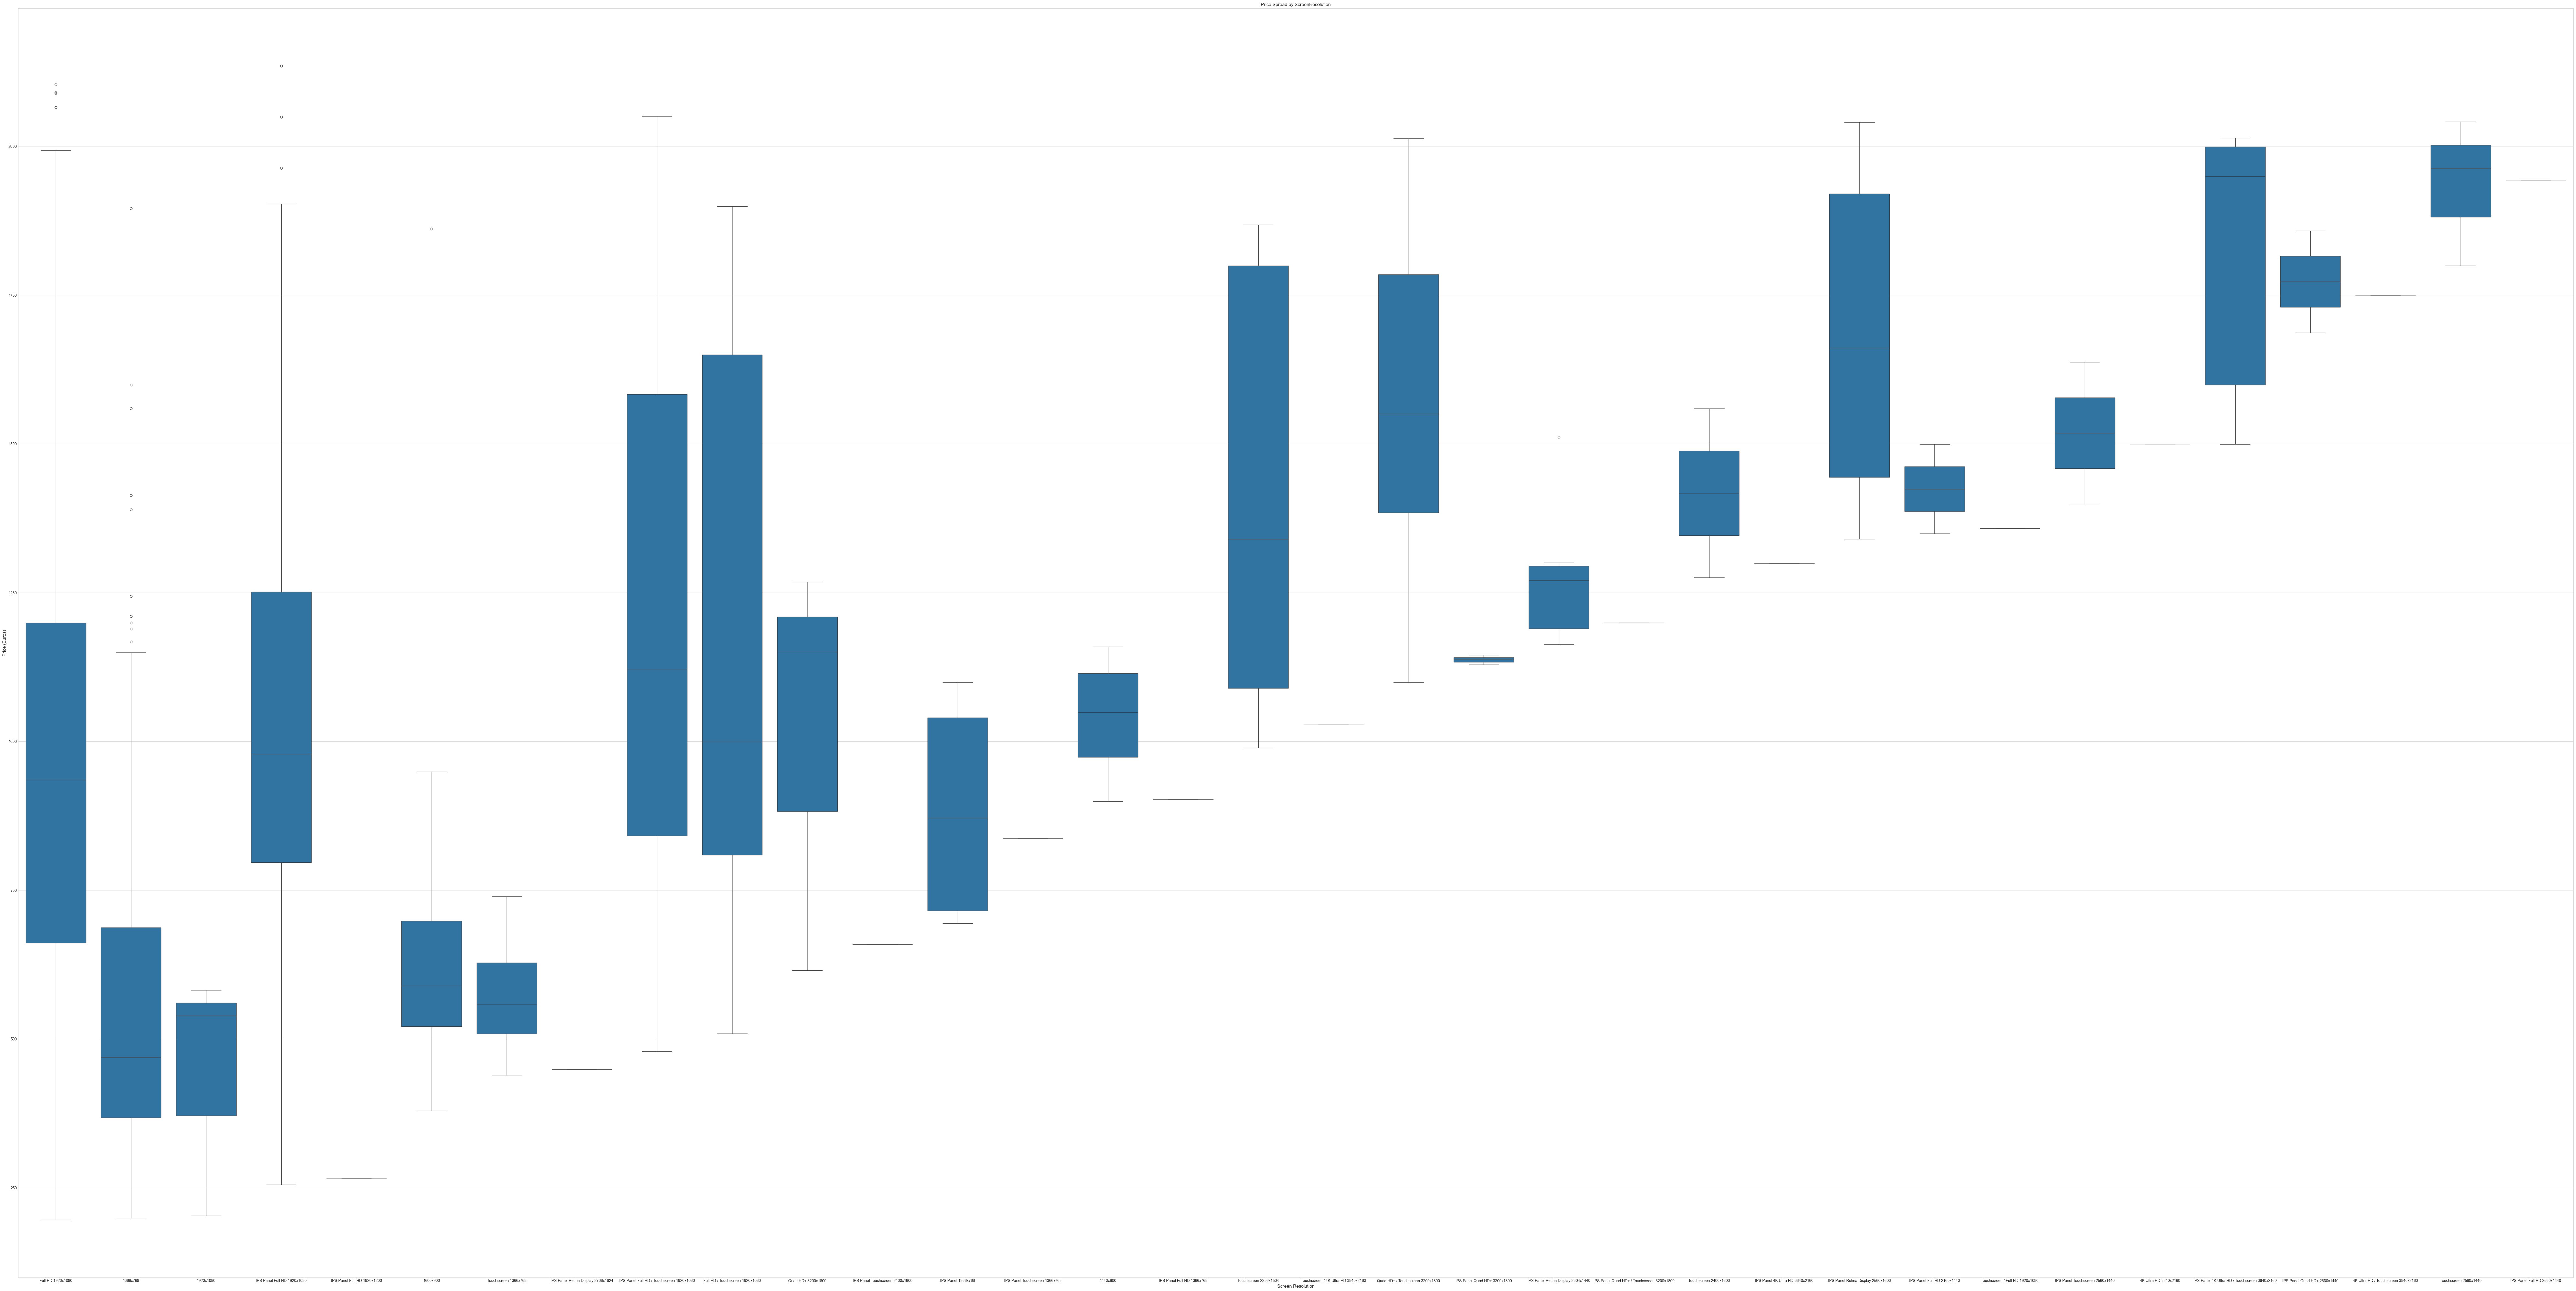

In [131]:
# Boxplot of Price Vs Screen resolution
plt.figure(figsize=(120, 60))
sns.boxplot(x='ScreenResolution', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by ScreenResolution')
plt.xlabel('Screen Resolution', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

2. Generate relevant visualizations (e.g., histograms, scatter plots, box plots, and correlation heatmaps) to illustrate key insights.

Price vs Numerical features

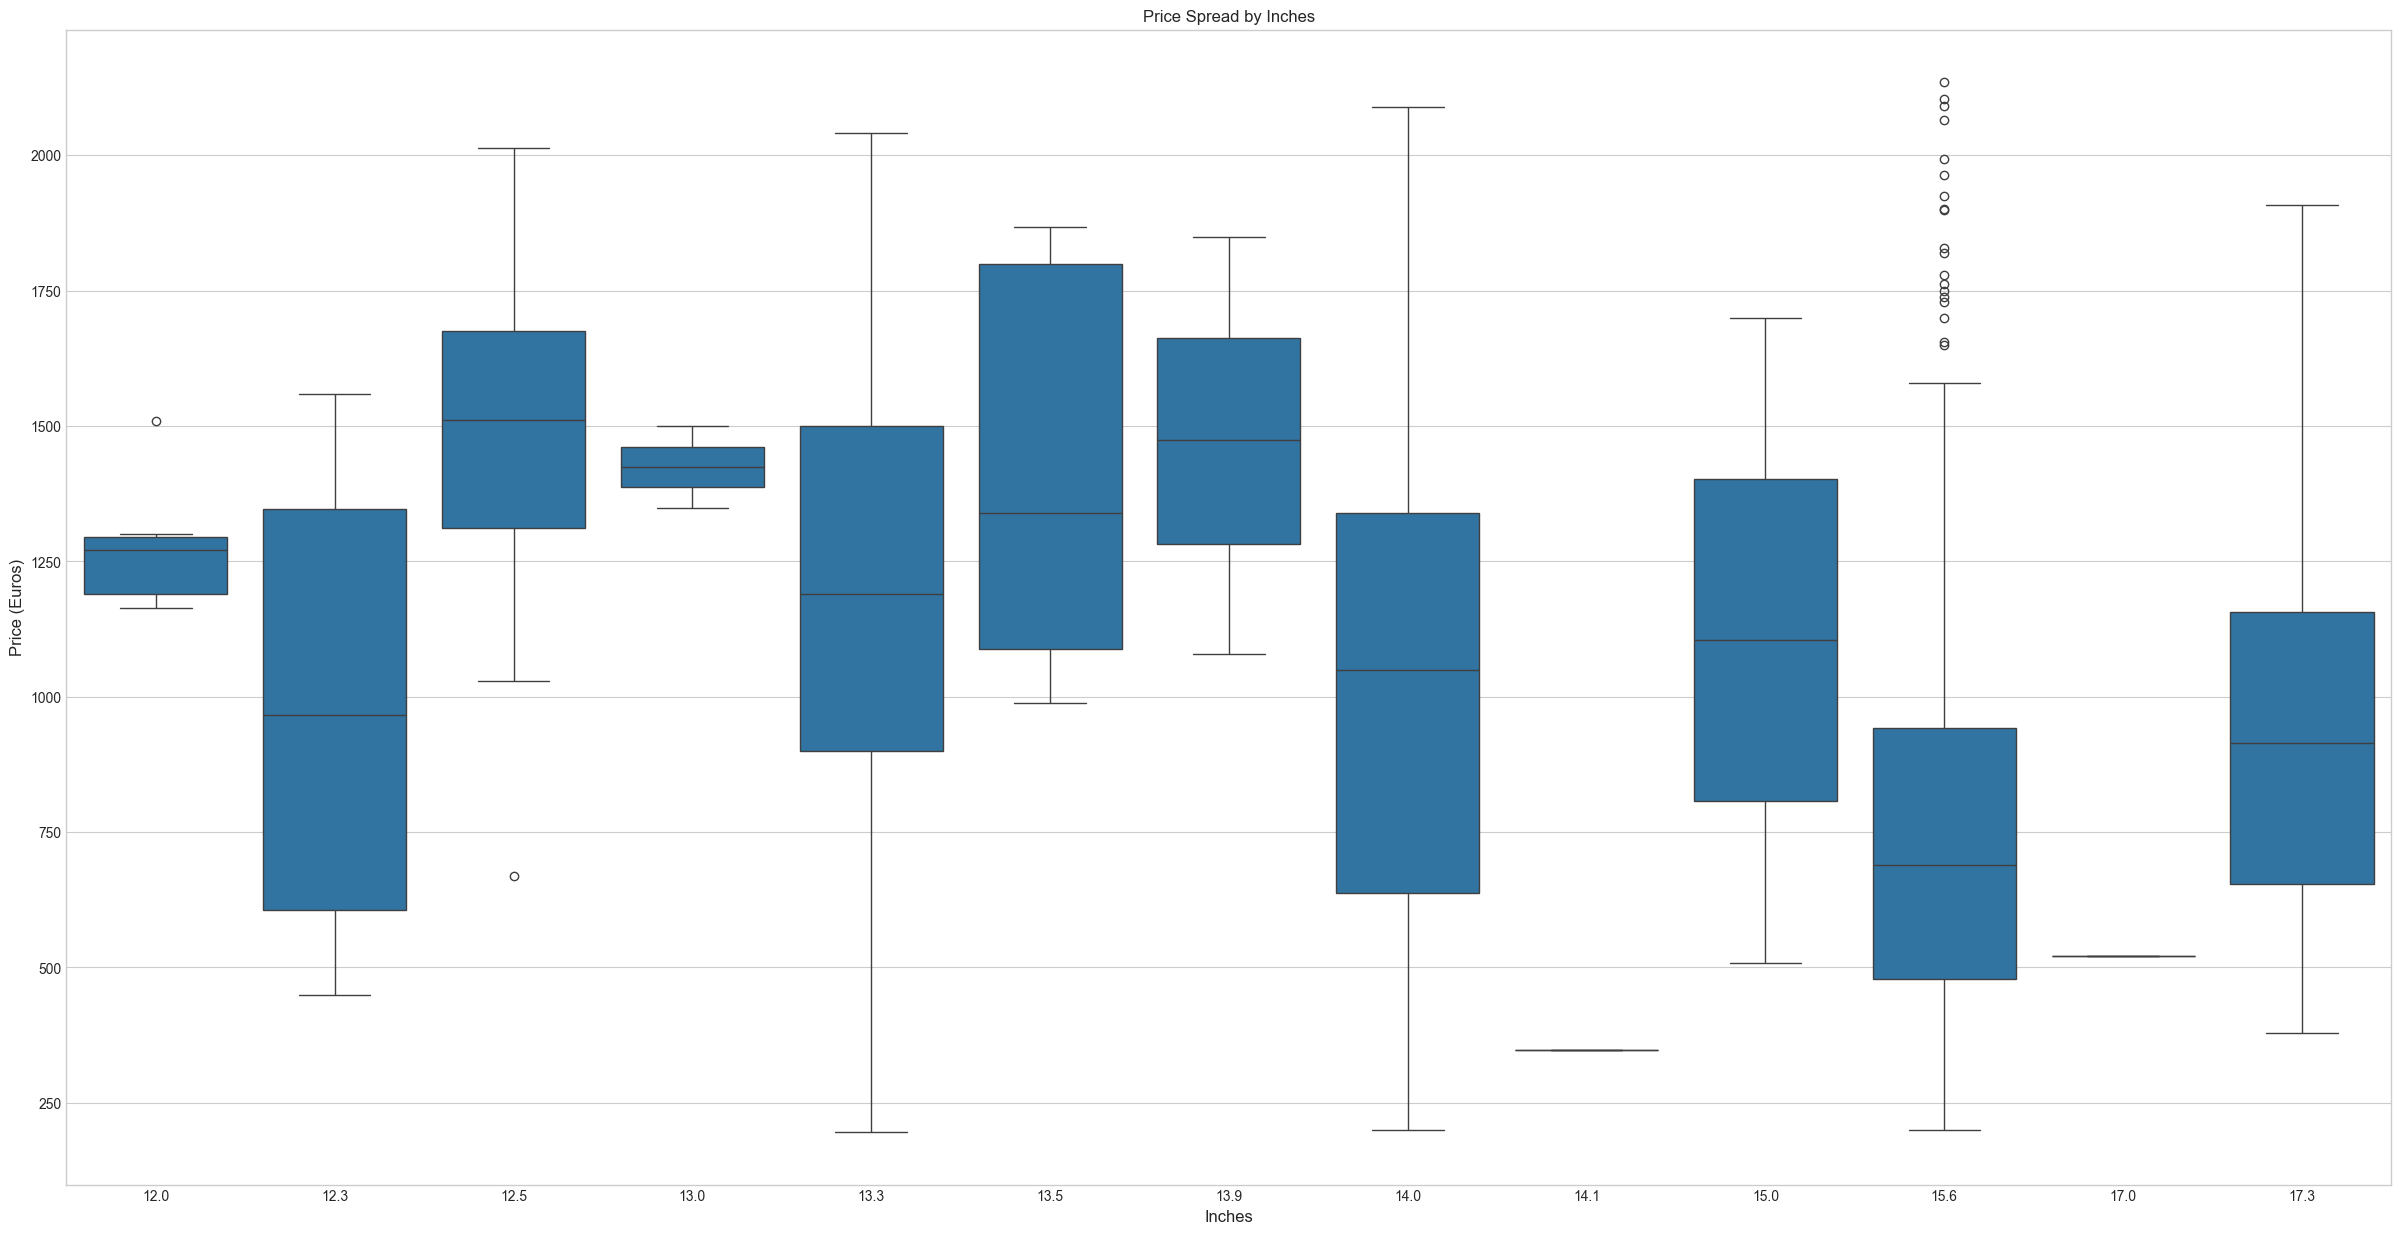

In [132]:
# Boxplot of Price vs Inches
plt.figure(figsize=(30, 15))
sns.boxplot(x='Inches', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Inches')
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

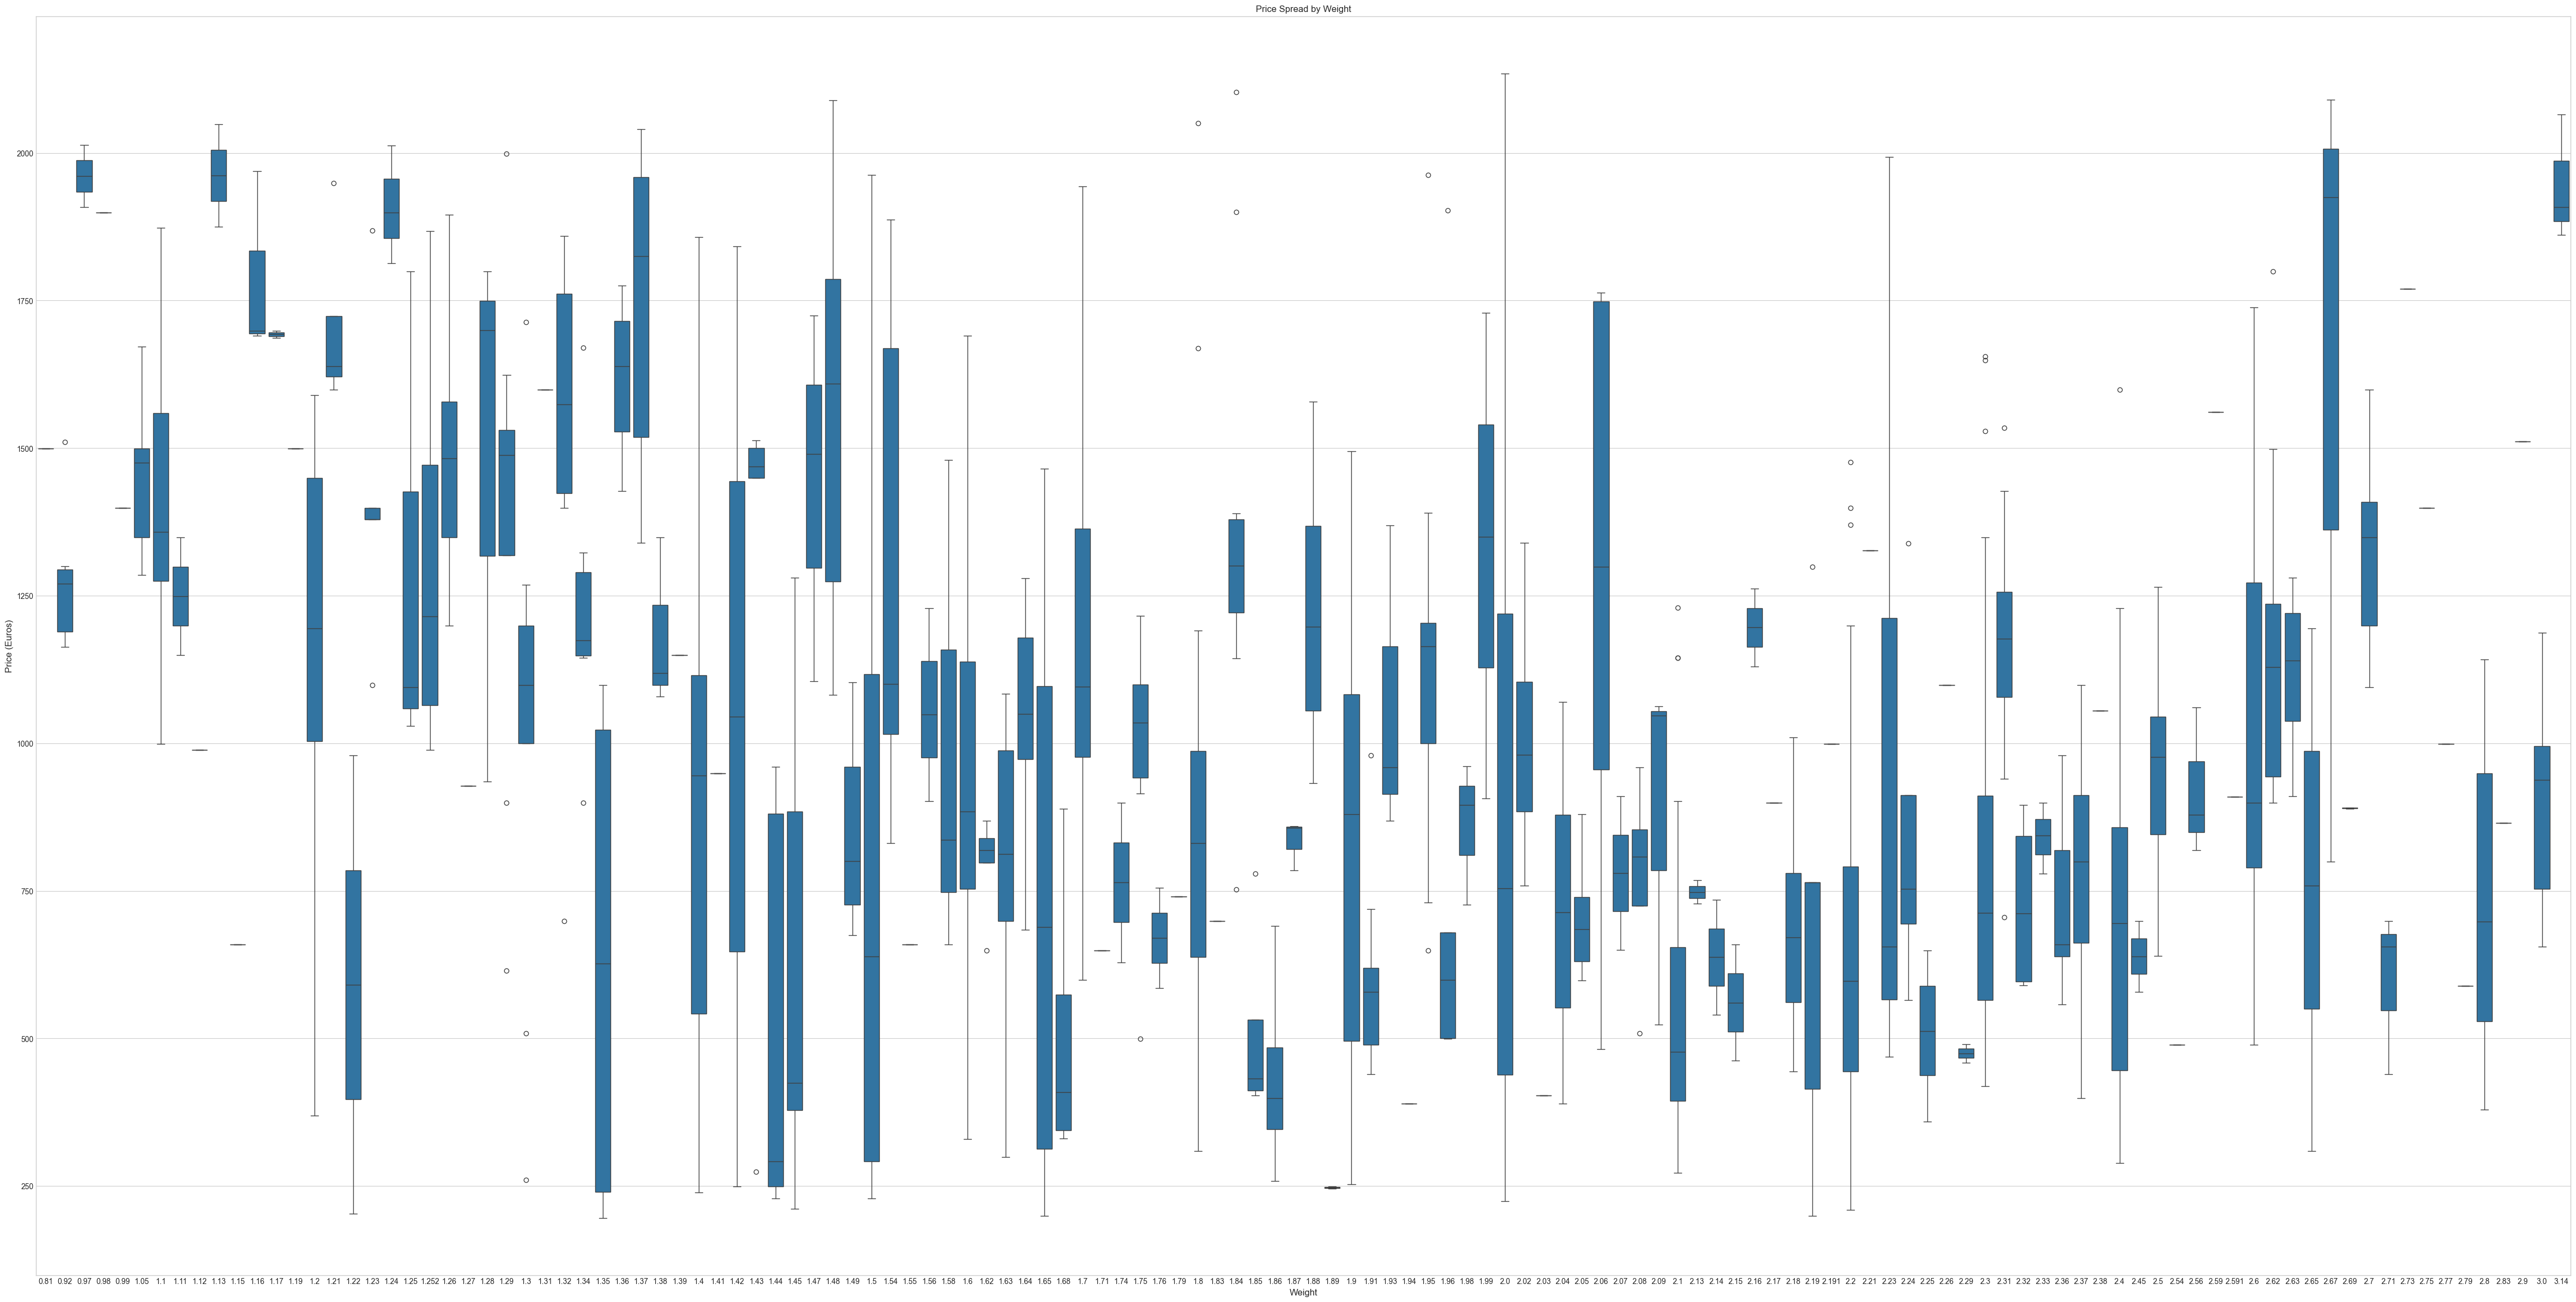

In [133]:
# Boxplot of Price vs Weight
plt.figure(figsize=(60, 30))
sns.boxplot(x='Weight', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Weight')
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

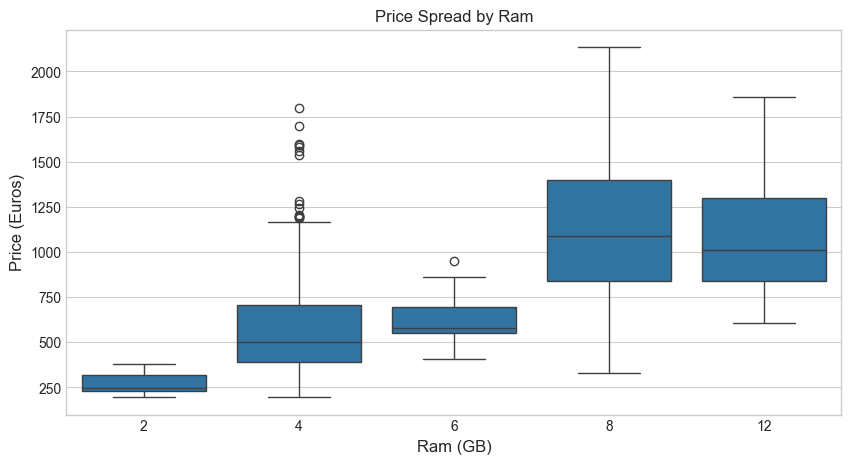

In [134]:
# Boxplot of Price vs Ram
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ram', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Ram')
plt.xlabel('Ram (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

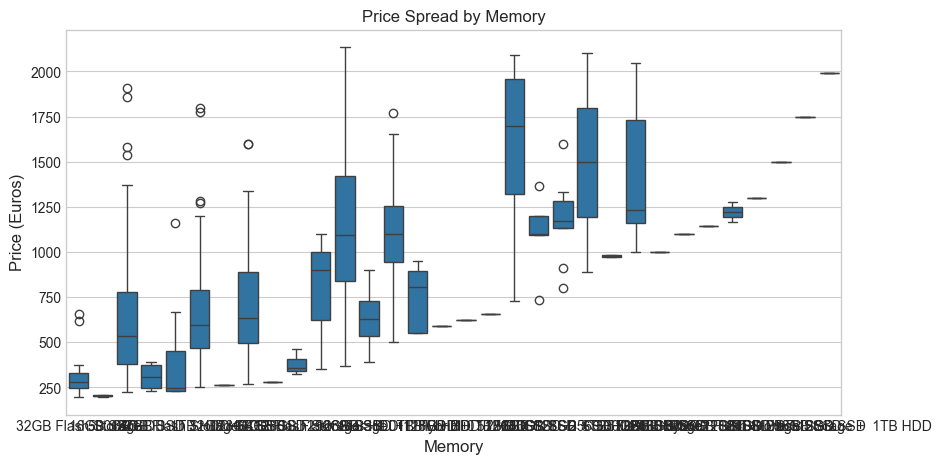

In [135]:
# Price vs Memory
plt.figure(figsize=(10, 5))
sns.boxplot(x='Memory', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Memory')
plt.xlabel('Memory', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

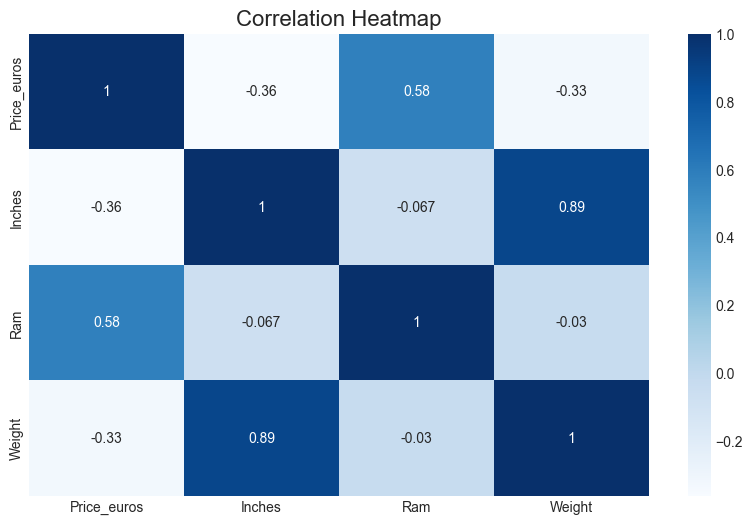

In [136]:
# Correlation heatmap
corr_matrix = df[['Price_euros', 'Inches', 'Ram', 'Weight']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

3. Identify and discuss the most influential factors affecting car prices based on your analysis.

Based on the EDA and the correlation heatmap, the most influential factors affecting laptop prices are:

1. **RAM**: This is the single most influential factor with the strongest positive correlation (r=0.74). Laptops with more RAM are consistently priced higher.

2. **Screen Resolution**: Both Resolution_Width (r=0.55) and Resolution_Height (r=0.55) show a strong positive correlation with price. Higher resolution screens, especially those with features like IPS panels and touchscreens, are key price drivers.

3. **GPU**: Laptops with Nvidia GPUs have a higher median price range compared to other brands. This is likely due to their use in high-end gaming and professional workstations.

4. **Weight and Memory**: There is a moderate positive correlation between price and Weight (r=0.21) and Total_Memory_Amount (r=0.24). While not as strong as RAM or resolution, these factors still play a significant role.

5. **Company**: The laptop brand itself is a major factor. Brands like Razer, LG, and Microsoft produce laptops that are generally priced higher than others.

## Feature Engineering

1. Create new and meaningful features from the existing dataset where possible.

In [137]:
# Extract Screen Width & Height from ScreenResolution

df.ScreenResolution= df["ScreenResolution"].str.split(" ").apply(lambda x: x[-1])

df['Screen Width']=df.ScreenResolution.str.split('x').apply(lambda x:x[0])
df['Screen Width']= df['Screen Width'].astype("float32")
df['Screen Height']=df.ScreenResolution.str.split('x').apply(lambda x:x[1])
df["Screen Height"] = df["Screen Height"].astype("float32")
df['Touch Screen']= df['ScreenResolution'].str.contains("Touch", case=False)
df['Touch Screen']= df['Touch Screen'].astype(int)
df=df.drop("ScreenResolution",axis=1)

# Extract CPU Brand (e.g., Intel, AMD, Samsung) and CPU frequemcy
df["Cpu Brand"] = df["Cpu"].str.split(" ").apply(lambda x: x[0])

df["Cpu Frequency"] = df["Cpu"].str.split(" ").apply(lambda x: x[-1])
df["Cpu Frequency"]=df["Cpu Frequency"].str[:-3] #to grab only the numbers
df["Cpu Frequency"] = df["Cpu Frequency"].astype('float32')

# Extract GPU Brand (e.g., Nvidia, Intel, AMD)
df['Gpu Brand'] = df['Gpu'].str.split(' ').apply(lambda x: x[0])
df= df.drop(['Cpu','Gpu'], axis=1)
# Extract Memory Amount (in GB)
df["Memory Amount"] = df["Memory"].str.split(' ').apply(lambda x: x[0])

# xtract Memory Type (SSD, HDD, Hybrid, Flash, Other)
df["Memory Type"] = df["Memory"].str.split(" ").apply(lambda x: x[1])

def make_all_memory_in_GB(value):
    if 'TB' in value:
        return float(value[:value.find('TB')]) * 1000
    elif  'GB' in value:
        return float(value[:value.find('GB')])

df["Memory Amount"] = df["Memory Amount"].apply(make_all_memory_in_GB)
df=df.drop('Memory',axis=1)

df

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen Width,Screen Height,Touch Screen,Cpu Brand,Cpu Frequency,Gpu Brand,Memory Amount,Memory Type
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560.0,1600.0,0,Intel,2.3,Intel,128.0,SSD
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440.0,900.0,0,Intel,1.8,Intel,128.0,Flash
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920.0,1080.0,0,Intel,2.5,Intel,256.0,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560.0,1600.0,0,Intel,3.1,Intel,256.0,SSD
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,1366.0,768.0,0,AMD,3.0,AMD,500.0,HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,4,Windows 10,2.20,720.32,1366.0,768.0,0,Intel,2.5,Nvidia,500.0,HDD
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,1920.0,1080.0,0,Intel,2.5,Intel,128.0,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,1366.0,768.0,0,Intel,1.6,Intel,64.0,Flash
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,1366.0,768.0,0,Intel,2.5,AMD,1000.0,HDD


### Features Encoding

In [138]:
# Import libraries for encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Create a copy of the original dataframe
df_encoded = df.copy()
df_encoded.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen Width,Screen Height,Touch Screen,Cpu Brand,Cpu Frequency,Gpu Brand,Memory Amount,Memory Type
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560.0,1600.0,0,Intel,2.3,Intel,128.0,SSD
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440.0,900.0,0,Intel,1.8,Intel,128.0,Flash
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920.0,1080.0,0,Intel,2.5,Intel,256.0,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560.0,1600.0,0,Intel,3.1,Intel,256.0,SSD
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,1366.0,768.0,0,AMD,3.0,AMD,500.0,HDD


In [139]:
# Encoding Categorical Features


# Determine categorical features
categorical_columns = df.select_dtypes(include="object").columns
print("Categorical columns:", list(categorical_columns))

"""
One-Hot Encoding Strategy:
Columns: Company, TypeName, OpSys
Reason: Low number of unique values, nominal (no natural order), important for model
"""
one_hot_columns = ["Company", "TypeName", "OpSys", 'Cpu Brand', 'Gpu Brand', 'Memory Type']

# Apply one-hot encoding
# for col in one_hot_columns:
#     # Create dummy variables
#     dummies = pd.get_dummies(df_encoded[col], prefix=col, dtype=int)
#     # Concatenate with the main dataframe
#     df_encoded = pd.concat([df_encoded, dummies], axis=1)
#     # Drop the original column
#     # df_encoded.drop(col, axis=1, inplace=True)
preprocessor = ColumnTransformer(
    transformers=[
        (
            "onehot",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            one_hot_columns,
        )
    ],
    remainder="passthrough",
)

Categorical columns: ['Company', 'Product', 'TypeName', 'OpSys', 'Cpu Brand', 'Gpu Brand', 'Memory Type']


In [140]:
df.columns


Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'Screen Width', 'Screen Height', 'Touch Screen',
       'Cpu Brand', 'Cpu Frequency', 'Gpu Brand', 'Memory Amount',
       'Memory Type'],
      dtype='object')

In [141]:

"""
Label Encoding Strategy:
Columns: Product, ScreenResolution, Cpu, Memory, Gpu
Reason: High number of unique values - one-hot encoding would create too many columns
"""
label_encoded_columns = ["Product" ]
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()  # Create new encoder for each column
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
df_encoded.info()

print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1008 non-null   object 
 1   Product        1008 non-null   int64  
 2   TypeName       1008 non-null   object 
 3   Inches         1008 non-null   float64
 4   Ram            1008 non-null   int32  
 5   OpSys          1008 non-null   object 
 6   Weight         1008 non-null   float32
 7   Price_euros    1008 non-null   float64
 8   Screen Width   1008 non-null   float32
 9   Screen Height  1008 non-null   float32
 10  Touch Screen   1008 non-null   int64  
 11  Cpu Brand      1008 non-null   object 
 12  Cpu Frequency  1008 non-null   float32
 13  Gpu Brand      1008 non-null   object 
 14  Memory Amount  1008 non-null   float64
 15  Memory Type    1008 non-null   object 
dtypes: float32(4), float64(3), int32(1), int64(2), object(6)
memory usage: 114.2+ KB
Original shape: (100

In [142]:
df_encoded.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen Width,Screen Height,Touch Screen,Cpu Brand,Cpu Frequency,Gpu Brand,Memory Amount,Memory Type
0,Apple,234,Ultrabook,13.3,8,macOS,1.37,1339.69,2560.0,1600.0,0,Intel,2.3,Intel,128.0,SSD
1,Apple,235,Ultrabook,13.3,8,macOS,1.34,898.94,1440.0,900.0,0,Intel,1.8,Intel,128.0,Flash
2,HP,50,Notebook,15.6,8,No OS,1.86,575.00,1920.0,1080.0,0,Intel,2.5,Intel,256.0,SSD
4,Apple,234,Ultrabook,13.3,8,macOS,1.37,1803.60,2560.0,1600.0,0,Intel,3.1,Intel,256.0,SSD
5,Acer,56,Notebook,15.6,4,Windows 10,2.10,400.00,1366.0,768.0,0,AMD,3.0,AMD,500.0,HDD


In [143]:
# Separate features and target for modeling
X = df_encoded.drop(["Price_euros"], axis=1)
y_encoded = df_encoded["Price_euros"]


# Create and fit a preprocessing pipeline for encoding
preprocessing_pipeline = Pipeline(steps=[
    ('encoder', preprocessor)
])
preprocessing_pipeline.fit(X)
X_processed = preprocessing_pipeline.transform(X)

# Convert processed data back to a DataFrame with appropriate column names
onehot = preprocessing_pipeline.named_steps['encoder'].named_transformers_['onehot']
onehot_feature_names = onehot.get_feature_names_out(one_hot_columns)

print("\nOne Hot Feature Names:", onehot_feature_names)
remaining_cols = [col for col in X.columns if col not in one_hot_columns]
print(f"\nRemaining Columns: {remaining_cols}")
final_columns = list(onehot_feature_names) + remaining_cols
X_final = pd.DataFrame(X_processed, columns=final_columns)
# X_final.head()
X_processed.shape



One Hot Feature Names: ['Company_Acer' 'Company_Apple' 'Company_Asus' 'Company_Chuwi'
 'Company_Dell' 'Company_Fujitsu' 'Company_Google' 'Company_HP'
 'Company_Huawei' 'Company_LG' 'Company_Lenovo' 'Company_MSI'
 'Company_Mediacom' 'Company_Microsoft' 'Company_Razer' 'Company_Samsung'
 'Company_Toshiba' 'Company_Vero' 'Company_Xiaomi'
 'TypeName_2 in 1 Convertible' 'TypeName_Gaming' 'TypeName_Netbook'
 'TypeName_Notebook' 'TypeName_Ultrabook' 'TypeName_Workstation'
 'OpSys_Chrome OS' 'OpSys_Linux' 'OpSys_Mac OS X' 'OpSys_No OS'
 'OpSys_Windows 10' 'OpSys_Windows 10 S' 'OpSys_Windows 7' 'OpSys_macOS'
 'Cpu Brand_AMD' 'Cpu Brand_Intel' 'Cpu Brand_Samsung' 'Gpu Brand_AMD'
 'Gpu Brand_ARM' 'Gpu Brand_Intel' 'Gpu Brand_Nvidia' 'Memory Type_Flash'
 'Memory Type_HDD' 'Memory Type_Hybrid' 'Memory Type_SSD']

Remaining Columns: ['Product', 'Inches', 'Ram', 'Weight', 'Screen Width', 'Screen Height', 'Touch Screen', 'Cpu Frequency', 'Memory Amount']


(1008, 53)

2.  Justify the creation of any new features and explain how they might improve model performance.

### Why These Features Are Important

We selected these features because they are highly relevant to predicting laptop prices:

1. **Screen Width & Screen Height** - Larger screens usually increase laptop prices.
2. **Cpu_Brand & Gpu_Brand** - Different brands perform differently and affect pricing.
3. **Cpu_Frequency** - Higher clock speeds often indicate faster and more expensive laptops.
4. **Memory_Amount & Memory_Type** - The size and type of storage significantly influence laptop costs.

These features provide the model with additional, meaningful information and are expected to improve prediction accuracy.

## Model Building

1.  Split your data into training and testing sets.

In [144]:
# Split the encoded data into training and test sets with stratification
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(756, 53) (756,)
(252, 53) (252,)


In [145]:
# Standardize numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

## numerical columns

numerical_cols = df.select_dtypes(include="number").columns
numerical_cols = numerical_cols.drop("Price_euros")  # Exclude target variable if present
numerical_cols = list(numerical_cols)
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_train.head()
numerical_cols

['Inches',
 'Ram',
 'Weight',
 'Screen Width',
 'Screen Height',
 'Touch Screen',
 'Cpu Frequency',
 'Memory Amount']

2. Build a linear regression model for laptop price prediction

In [146]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


3. Train the regression model on the training data.


In [147]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Model Evaluation

1. Evaluate the performance of your trained models on the test set using appropriate regression metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).

In [148]:

# Make predictions on the training data
y_train_pred = model.predict(X_train)
print(f"Predicted training data: {y_train_pred[:10]}")
print(f"\nActual training data: {(y_train[:10].values)}")


# Make predictions on the test data
y_pred = model.predict(X_test)
print(f"Predicted training data: {y_pred[:10]}")
print(f"\nActual training data: {(y_test[:10].values)}")

Predicted training data: [ 511.58223658  316.9125409   329.68193054  372.01983765 1113.21670074
  906.76600916  545.98042636  567.67468186  513.61431453  753.34918028]

Actual training data: [ 462.35  410.8   579.    359.   1031.    850.66  617.9   478.    599.
  769.99]
Predicted training data: [1227.10412809 1256.69355916 1064.50300015 1376.32043675 1515.67328905
  456.4317094   506.36478917  934.06565176  966.26752523  671.5260189 ]

Actual training data: [ 931.88  919.    750.   1349.   1518.55  428.    389.    906.62  713.99
  689.  ]


In [149]:
# Import metrics for evaluating model performance
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
)

# Calculate evaluation metrics for the training data
r2 = r2_score(y_train, y_train_pred)
mae_val = mean_absolute_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_train, y_train_pred)
rmse_val = np.sqrt(mse_val)

# Print evaluation metrics for the training data
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae_val:.3f}")
print(f"MSE: {mse_val:.3f}")
print(f"RMSE: {rmse_val:.3f}")


R² Score: 0.735
MAE: 176.037
MSE: 53059.526
RMSE: 230.347


In [150]:
# Calculate evaluation metrics for the test data
r2 = r2_score(y_test, y_pred)
mae_val = mean_absolute_error(y_test, y_pred)
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = np.sqrt(mse_val)

# Print evaluation metrics for the test data
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae_val:.3f}")
print(f"MSE: {mse_val:.3f}")
print(f"RMSE: {rmse_val:.3f}")

R² Score: 0.717
MAE: 175.806
MSE: 52923.648
RMSE: 230.051


### Visualling Training and Testing Data Predictions

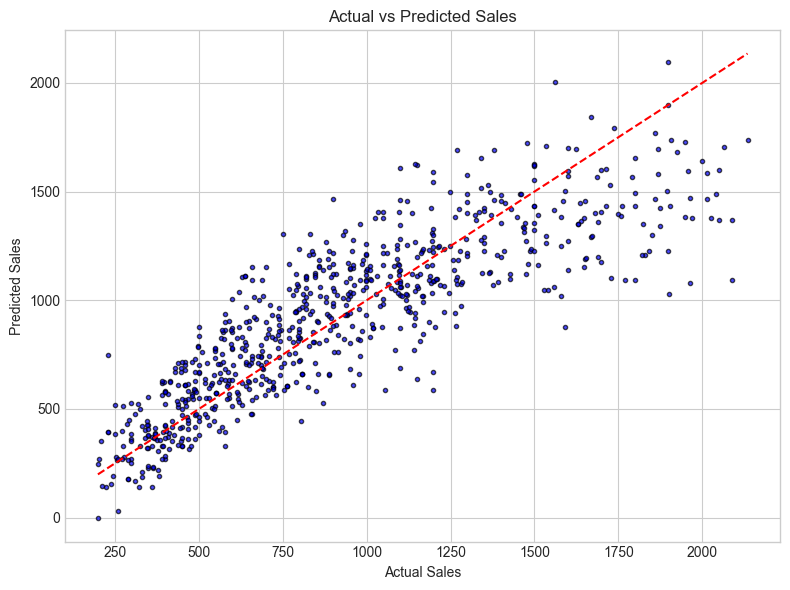

In [151]:
#  Plot actual vs. predicted sales for training data

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='k', alpha=0.7,
s=9)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

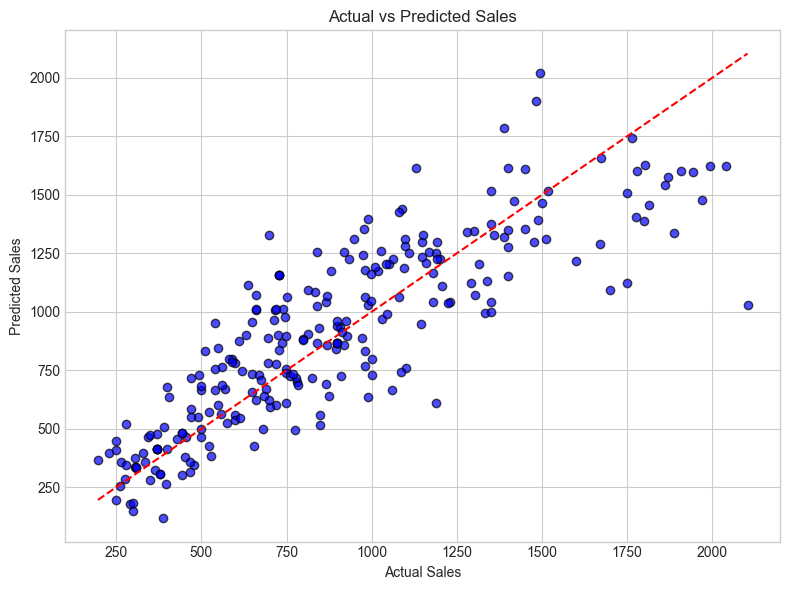

In [152]:
# Plot actual vs. predicted sales for test data

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

## Save Model and Preprocessing Objects

In [ ]:
# Save the trained model and preprocessing components for deployment
import os
import joblib
model_dir = 'models_files'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(model, os.path.join(model_dir, 'linear_regression_model.pkl'))
joblib.dump(preprocessor, os.path.join(model_dir, 'onehot_preprocessor.pkl'))
joblib.dump(label_encoders, os.path.join(model_dir, 'label_encoders.pkl'))
joblib.dump(scaler, os.path.join(model_dir, 'scaler.pkl'))

print("Model and encoders saved successfully.")

Model and encoders saved successfully.
